In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import cm
from scipy.signal import savgol_filter

In [3]:
path="/lustre/ytzheng/"

Casename = 'ASTEX_warm2.6'
Casename1 = 'ASTEX_warm5.2'
Casename2 = 'ASTEX_warm2.6_Div3'

f = xr.open_mfdataset(path + Casename + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)
f1 = xr.open_mfdataset(path + Casename1 + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)
f2 = xr.open_mfdataset(path + Casename2 + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)

In [4]:
f = f.isel(time = slice(0,60))
f1 = f1.isel(time = slice(0,60))
f2 = f2.isel(time = slice(0,60))
nt = f['time'].size
t_hours = np.arange(nt)

z = f['z']/1000.

myfontsize = 12

In [5]:
def plt2D(fig, ax, x, y, z, ztitle, mycmap=cm.coolwarm, mylevels=[0.], extend = 'neither',
         yrange = [0., 2.], xrange = [0., 60.], cbar = False, xlabel = False, ylabel = False, out = False):
    if len(mylevels) == 1:
#         norm = cm.colors.BoundaryNorm(mylevels,256)
        oax = ax.contourf(x,y,z, cmap = mycmap, extend = extend)
    else:
        oax = ax.contourf(x,y,z, cmap = mycmap, levels = mylevels, extend = extend)
    
    if cbar:
        cbar = fig.colorbar(oax, ax = ax, orientation='vertical', shrink=1.)
        cbar.set_label(ztitle, fontsize=myfontsize)
    
    ax.set_ylim(yrange)
    ax.set_xlim(xrange)
    if ylabel:
        ax.set_ylabel('Height (km)', fontsize=myfontsize) 
    
    if xlabel:
        ax.set_xlabel('Time (h)', fontsize=myfontsize) 
        
#     ax.grid(True)
    if out:
        return oax

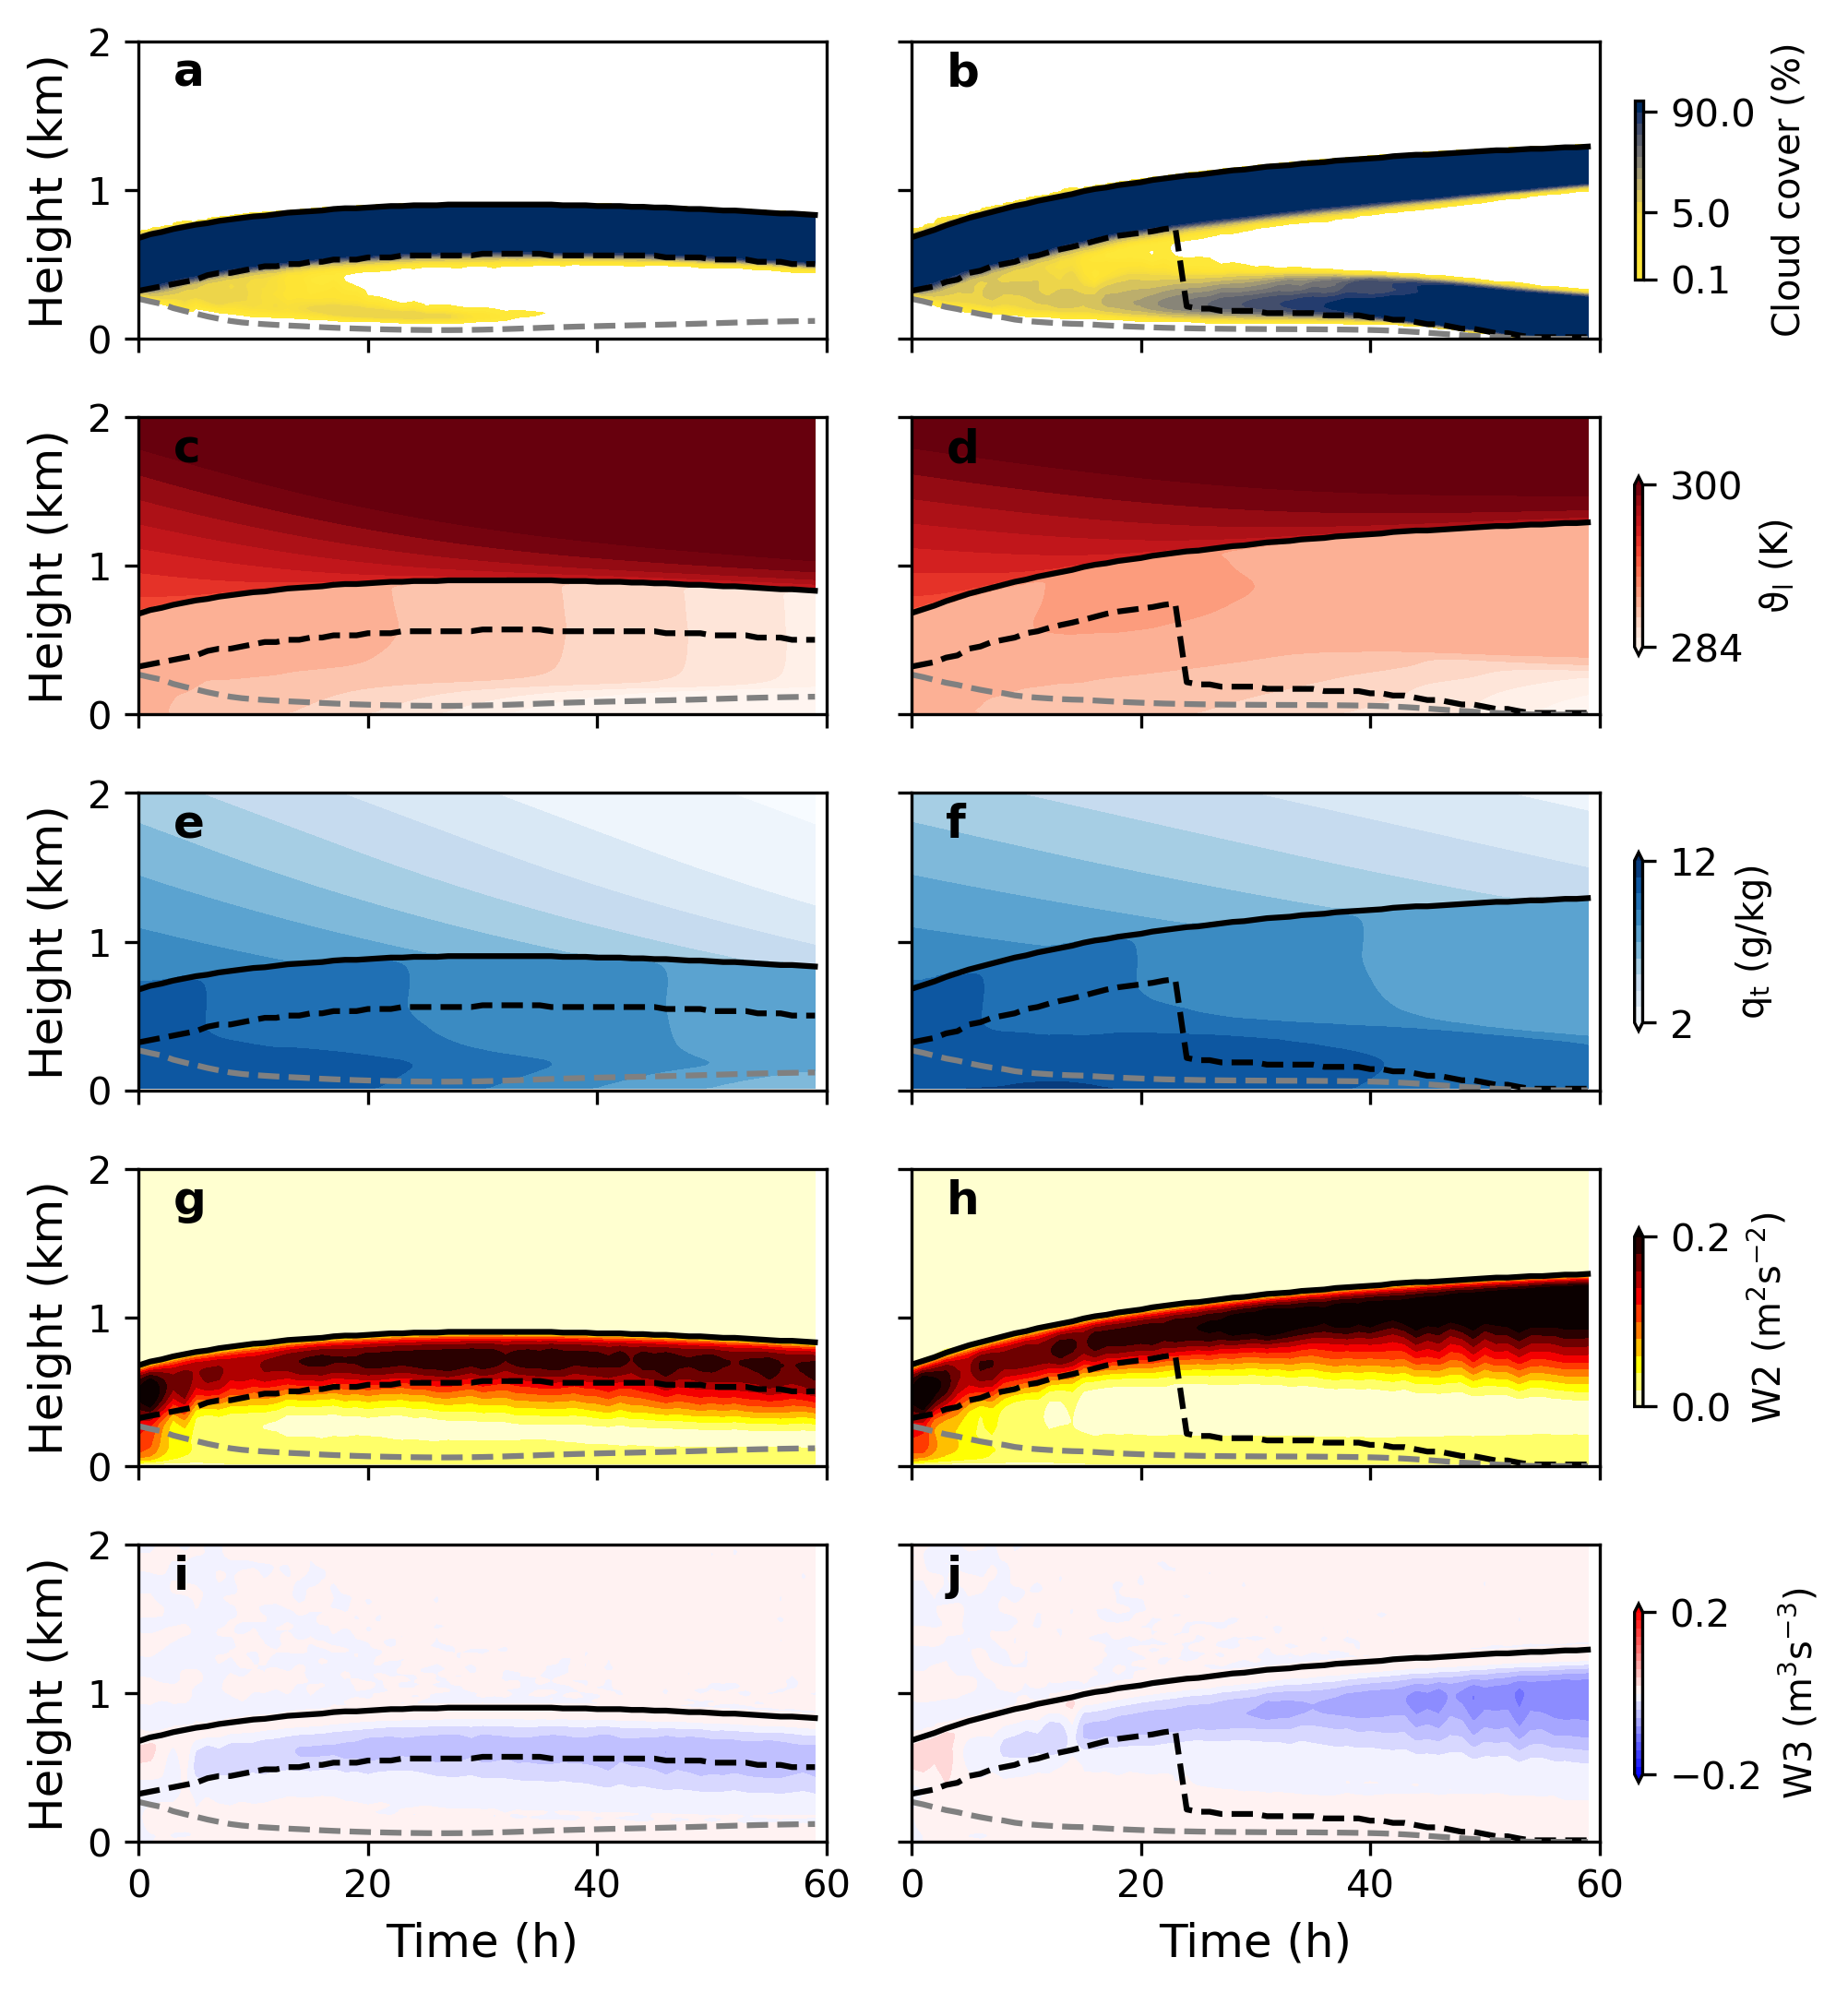

In [26]:
fig, axs = plt.subplots(ncols = 2,
                        nrows = 5,
                        sharex = True, sharey = True,
                        figsize=(18/2.54, (18)/2.54), dpi = 300)
plt.tight_layout()

#
mylevels = [0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

plt2D(fig, axs[0,0], t_hours, z, 100.*f1['CLD'].T, 'Cloud cover (%)', mycmap=cm.cividis_r, 
      mylevels=mylevels, ylabel = True)
oax = plt2D(fig, axs[0,1], t_hours, z, 100.*f2['CLD'].T, 'Cloud cover (%)', mycmap=cm.cividis_r,
            mylevels=mylevels, out = True)

cbar = fig.colorbar(oax,  ax=axs[0], orientation='vertical', shrink=0.6,
                    ticks = [0.1, 5., 90],
                    pad=0.02)
cbar.set_label(r"$\mathrm{Cloud \ cover}$ (%)", fontsize=0.8*myfontsize)

#
mylevels = np.linspace(284, 300, 16 + 1)

plt2D(fig, axs[1,0], t_hours, z, f1['THETAL'].T, 'THETAL (K)', mycmap=cm.Reds, mylevels=mylevels, extend='both', 
      ylabel = True)
oax = plt2D(fig, axs[1,1], t_hours, z, f2['THETAL'].T, 'THETAL (K)', mycmap=cm.Reds, mylevels=mylevels,
            extend='both', out = True)

cbar = fig.colorbar(oax,  ax=axs[1], orientation='vertical', shrink=0.6,
                    ticks = [mylevels.min(), mylevels.max()],
                    pad=0.02)
cbar.set_label(r"$\mathrm{\vartheta_l \ (K)}$", fontsize=0.8*myfontsize)

#
mylevels = np.linspace(2, 12, 10 + 1)

plt2D(fig, axs[2,0], t_hours, z, f1['QT'].T, 'QT (g/kg)', mycmap=cm.Blues, mylevels=mylevels, extend='both', 
      ylabel = True)
oax = plt2D(fig, axs[2,1], t_hours, z, f2['QT'].T, 'QT (g/kg)', mycmap=cm.Blues, mylevels=mylevels, 
      extend='both', out = True)

cbar = fig.colorbar(oax,  ax=axs[2], orientation='vertical', shrink=0.6,
                    ticks = [mylevels.min(), mylevels.max()],
                    pad=0.02)
cbar.set_label(r"$\mathrm{q_t \ (g/kg)}$", fontsize=0.8*myfontsize)

#
mylevels = np.linspace(0, 0.2, 10 + 1)

plt2D(fig, axs[3,0], t_hours, z, f1['W2'].T, 'W2 (m2/s2)', mycmap=cm.hot_r, mylevels=mylevels, extend='max',
     ylabel = True)
oax =plt2D(fig, axs[3,1], t_hours, z, f2['W2'].T, 'W2 (m2/s2)', mycmap=cm.hot_r, mylevels=mylevels, 
      extend='max', out = True)

cbar = fig.colorbar(oax,  ax=axs[3], orientation='vertical', shrink=0.6,
                    ticks = [mylevels.min(), mylevels.max()],
                    pad=0.02)
cbar.set_label(r"$\mathrm{W2 \ (m^2s^{-2})}$", fontsize=0.8*myfontsize)

#
mylevels = np.linspace(-0.2, 0.2, 20 + 1)

plt2D(fig, axs[4, 0], t_hours, z, f1['W3'].T, 'W3 (m3/s3)', mycmap=cm.bwr, mylevels=mylevels, extend='both',
     ylabel = True, xlabel = True)
oax =plt2D(fig, axs[4, 1], t_hours, z, f2['W3'].T, 'W3 (m3/s3)', mycmap=cm.bwr, mylevels=mylevels, extend='both',
     xlabel = True, out = True)

cbar = fig.colorbar(oax,  ax=axs[4], orientation='vertical', shrink=0.6,
                    ticks = [mylevels.min(), mylevels.max()],
                    pad=0.02)
cbar.set_label(r"$\mathrm{W3 \ (m^3s^{-3})}$", fontsize=0.8*myfontsize)

mylabel = np.array((['a','b'],['c','d'], ['e','f'], ['g','h'], ['i','j']))

for i in range(5):
    axs[i, 0].plot(t_hours, f1['zct']/1000., color = 'black')
    axs[i, 0].plot(t_hours, f1['zcb']/1000., color = 'black', linestyle = '--')
    axs[i, 0].plot(t_hours, f1['LCL']/1000., color = 'grey', linestyle = '--')

    axs[i, 1].plot(t_hours, f2['zct']/1000., color = 'black')
    axs[i, 1].plot(t_hours, f2['zcb']/1000., color = 'black', linestyle = '--')
    axs[i, 1].plot(t_hours, f2['LCL']/1000., color = 'grey', linestyle = '--')

    for j in range (2):
        axs[i,j].text(0.05, 0.85, mylabel[i,j], transform=axs[i,j].transAxes,fontsize=myfontsize, fontweight='bold')


In [6]:
def plt1D(ax, x, y, y1, y2, ytitle, smooth=0
         ,xlabel = 1, xrange = [0, 60]):
    if smooth == 0:
        ax.plot(x, y, linewidth=2, label = 'wadv', color = 'crimson')
        ax.plot(x, y1, linewidth=2, label = 'wadv Tadv5.2', linestyle = '-',color = 'forestgreen')
        ax.plot(x, y2, linewidth=2, label = 'wadv Div3', linestyle = '-',color = 'orange')
    else:
        ax.plot(x, y, linewidth=2, color = 'crimson', alpha=0.2)
        ax.plot(x, y1, linewidth=2, linestyle = '-',color = 'forestgreen', alpha=0.2)
        ax.plot(x, y2, linewidth=2, linestyle = '-',color = 'orange', alpha=0.2)
        
        yhat = savgol_filter(y, 15, 3)
        yhat1 = savgol_filter(y1, 15, 3)
        yhat2 = savgol_filter(y2, 15, 3)
        
        ax.plot(x, yhat, linewidth=2, label = 'wadv', color = 'crimson')
        ax.plot(x, yhat1, linewidth=2, label = 'wadv Tadv5.2', linestyle = '-',color = 'forestgreen')
        ax.plot(x, yhat2, linewidth=2, label = 'wadv Div3', linestyle = '-',color = 'orange')
        
    ax.grid(True)
    ax.set_xlim(xrange)
    ax.set_ylabel(ytitle, fontsize=myfontsize)  # Add a y-label to the axes.
    if xlabel != 0:
        ax.set_xlabel('Time (hours)', fontsize=myfontsize)  # Add a y-label to the axes.

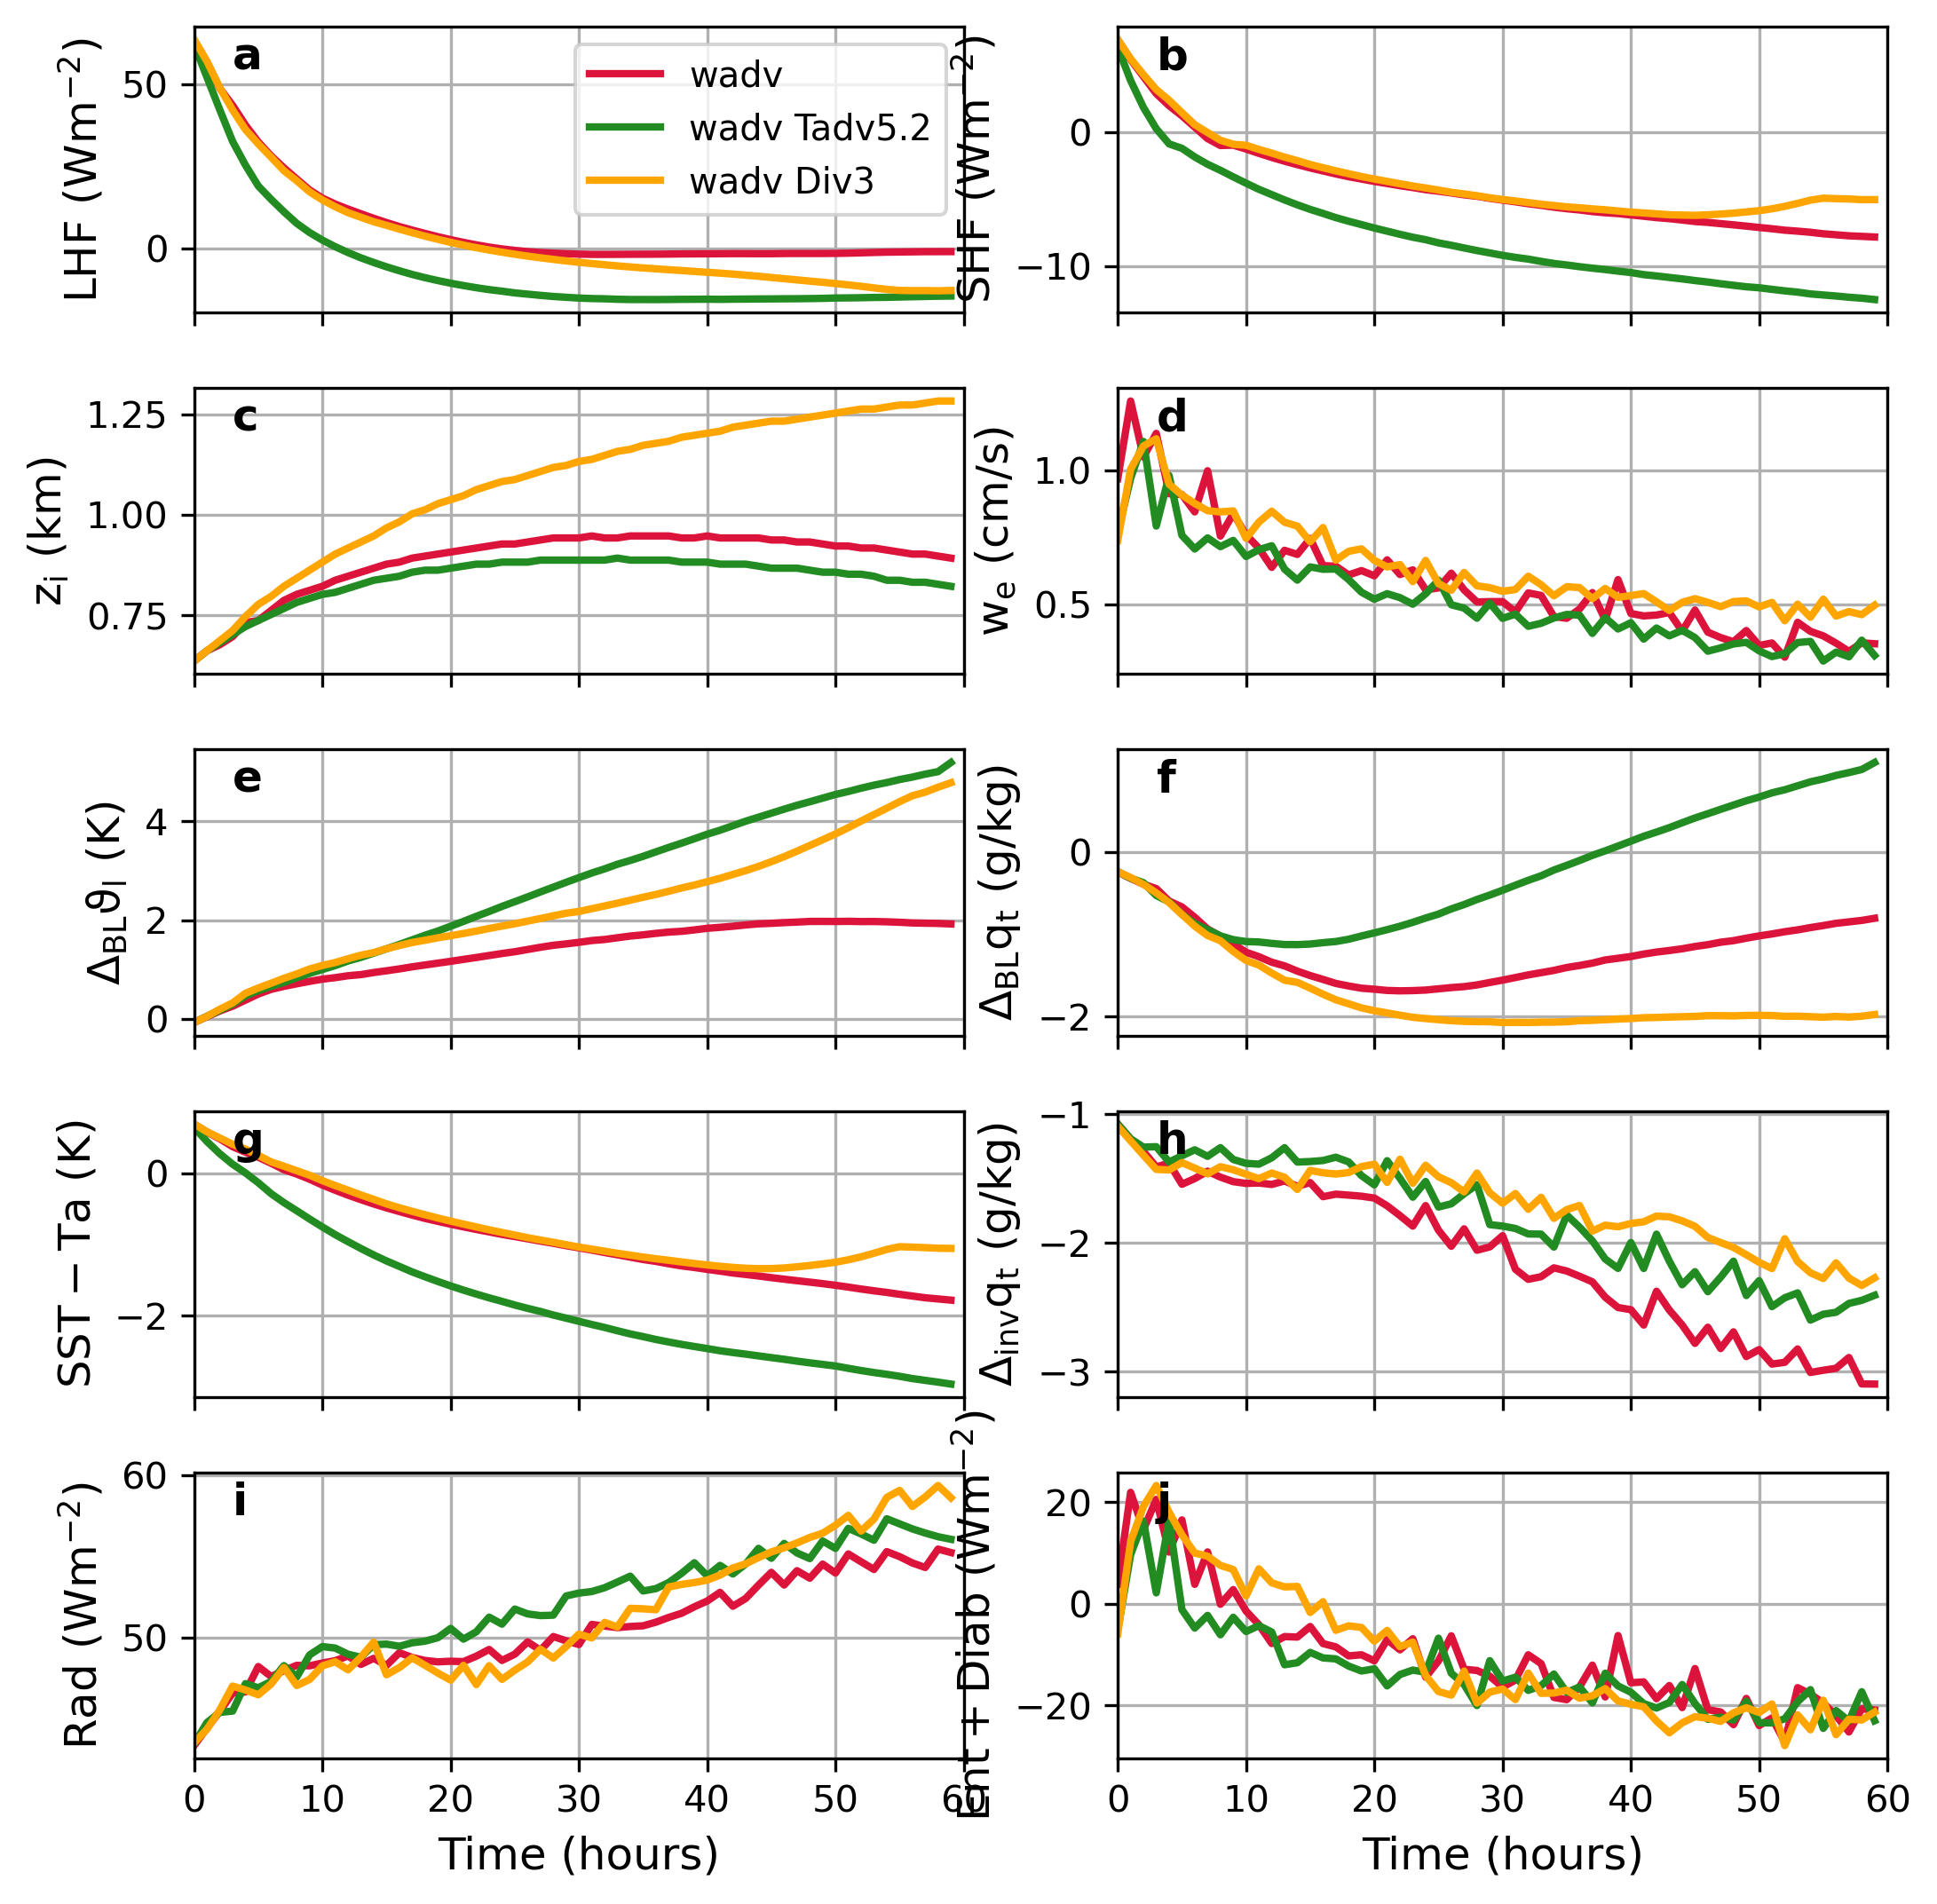

In [16]:
fig, axs = plt.subplots(ncols = 2,
                        nrows = 5,
                        sharex = True, sharey = False,
                        figsize=(18/2.54, (18)/2.54), dpi = 300)

plt.tight_layout()

plt1D(axs[0,0], t_hours, f['LHF'][0:nt], f1['LHF'][0:nt], f2['LHF'][0:nt],
      r"$\mathrm{LHF \ (Wm^{-2})}$", xlabel = 0)
axs[0,0].legend(loc="best", fontsize=0.8*myfontsize)

plt1D(axs[0,1], t_hours, f['SHF'][0:nt], f1['SHF'][0:nt], f2['SHF'][0:nt],
      r"$\mathrm{SHF \ (Wm^{-2})}$", xlabel = 0)

plt1D(axs[1,0], t_hours, f['zinvb'][0:nt]/1000., f1['zinvb'][0:nt]/1000.,f2['zinvb'][0:nt]/1000.,
      r"$\mathrm{z_i \ (km)}$", xlabel = 0)

plt1D(axs[1,1], t_hours, 100.*f['we'][0:nt], 100.*f1['we'][0:nt], 100.*f2['we'][0:nt],
      r"$\mathrm{w_e \ (cm/s)}$", xlabel = 0, smooth = 0)

plt1D(axs[2,0], t_hours, f['delta_thetal'][0:nt], f1['delta_thetal'][0:nt], f2['delta_thetal'][0:nt],
      r"$\mathrm{\Delta_{BL} \vartheta_l \ (K)}$", xlabel = 0)

plt1D(axs[2,1], t_hours, f['delta_qt'][0:nt], f1['delta_qt'][0:nt], f2['delta_qt'][0:nt],
     r"$\mathrm{\Delta_{BL} q_t \ (g/kg)}$", xlabel = 0)

plt1D(axs[3,0], t_hours, f['SST'] - f['TABS'].isel(z=0), f1['SST'] - f1['TABS'].isel(z=0), f2['SST'] - f2['TABS'].isel(z=0),
      r"$\mathrm{SST - Ta \ (K)}$", xlabel = 0)

plt1D(axs[3,1], t_hours, 1000.*(f['qt_zinvt'] - f['qt_zinvb']), 1000.*(f1['qt_zinvt'] - f1['qt_zinvb']), 1000.*(f2['qt_zinvt'] - f2['qt_zinvb']),
      r"$\mathrm{\Delta_{inv} q_t \ (g/kg)}$", xlabel = 0)

plt1D(axs[4,0], t_hours, f['CldRCool'][0:nt], f1['CldRCool'][0:nt], f2['CldRCool'][0:nt],
      r"$\mathrm{Rad \ (Wm^{-2})}$")

plt1D(axs[4,1], t_hours, f['TVFLX_we_Wm2'] + f['Prec_wm2'] - f['CldRCool'],
      f1['TVFLX_we_Wm2'] + f1['Prec_wm2'] - f1['CldRCool'],
      f2['TVFLX_we_Wm2'] + f2['Prec_wm2'] - f2['CldRCool'],
      r"$\mathrm{Ent + Diab \ (Wm^{-2})}$", smooth = 0)

mylabel = np.array((['a','b'],['c','d'], ['e','f'], ['g','h'], ['i','j']))

for i in range(5):
    for j in range (2):
        axs[i,j].text(0.05, 0.85, mylabel[i,j], transform=axs[i,j].transAxes,fontsize=myfontsize, fontweight='bold')

In [15]:
def pltprf(ax, var1, var2, var3, z1, z2, z3,
           xlim,
           xlabel = ' ', ylabel = ' '):
    
    ax.plot(var1, z1, linewidth=2, label = 'WADV', color = 'crimson')
    ax.plot(var2, z2, linewidth=2, label = 'WADV5.2', color = 'forestgreen')
    ax.plot(var3, z3, linewidth=2, label = 'WADV Div3', color = 'orange')
    
    ax.set_ylabel(ylabel, fontsize=myfontsize) 
    ax.set_xlabel(xlabel, fontsize=myfontsize) 
    
    ax.set_ylim([0., 1.1])
    ax.set_xlim(xlim)
    
    ax.grid(True)

In [41]:
z2D = f['z'].expand_dims(time = f['time'].size)

In [46]:
#determine top of surface inversion
THL2_tmp = f.THL2.where(f.z < 0.7*1000.*f.ZINV)
indtmp = THL2_tmp.argmax(dim = 'z', skipna = 'True')
zinv_bot = f.z[indtmp]/1000.
qtflx_up = f.QTFLUX.sel(z = 1000.*zinv_bot, method="nearest")
qtflx_bot = f.QTFLUX.sel(z = f.z[0], method="nearest")

qt_zinv_bot = f.QT.sel(z = 1000.*zinv_bot, method="nearest")
thl_zinv_bot = f.THETAL.sel(z = 1000.*zinv_bot, method="nearest")
thl2_zinv_bot = f.THL2.sel(z = 1000.*zinv_bot, method="nearest")

THL2_tmp = f1.THL2.where(f1.z < 0.7*1000.*f1.ZINV)
indtmp = THL2_tmp.argmax(dim = 'z', skipna = 'True')
zinv_bot1 = f1.z[indtmp]/1000.
qtflx_up1 = f1.QTFLUX.sel(z = 1000.*zinv_bot1, method="nearest")
qtflx_bot1 = f1.QTFLUX.sel(z = f.z[0], method="nearest")

qt_zinv_bot1 = f1.QT.sel(z = 1000.*zinv_bot1, method="nearest")
thl_zinv_bot1 = f1.THETAL.sel(z = 1000.*zinv_bot1, method="nearest")
thl2_zinv_bot1 = f1.THL2.sel(z = 1000.*zinv_bot1, method="nearest")

THL2_tmp = f2.THL2.where(f2.z < 0.7*1000.*f2.ZINV)
indtmp = THL2_tmp.argmax(dim = 'z', skipna = 'True')
zinv_bot2 = f2.z[indtmp]/1000.
qtflx_up2 = f2.QTFLUX.sel(z = 1000.*zinv_bot2, method="nearest")
qtflx_bot2 = f2.QTFLUX.sel(z = f.z[0], method="nearest")

qt_zinv_bot2 = f2.QT.sel(z = 1000.*zinv_bot2, method="nearest")
thl_zinv_bot2 = f2.THETAL.sel(z = 1000.*zinv_bot2, method="nearest")
thl2_zinv_bot2 = f2.THL2.sel(z = 1000.*zinv_bot2, method="nearest")

In [47]:
indtmp

<xarray.DataArray 'THL2' (time: 60)>
dask.array<nanarg_agg-aggregate, shape=(60,), dtype=int64, chunksize=(60,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) float32 165.02083 165.0625 165.10417 ... 167.4375 167.47917

In [49]:
f

<xarray.Dataset>
Dimensions:               (time: 60, z: 512)
Coordinates:
  * z                     (z) float32 10.5 22.5 37.5 ... 4055.5 4182.2 4320.9
  * time                  (time) float32 165.02083 165.0625 ... 167.47917
Data variables:
    p                     (z) float32 dask.array<chunksize=(512,), meta=np.ndarray>
    SST                   (time) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    Ps                    (time) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    CLDSHD                (time) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    AREAPREC              (time) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    CLD245                (time) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    WMAX                  (time) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    UMAX                  (time) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    PREC                  (time) float32 dask.array<chunksize=(60,), me

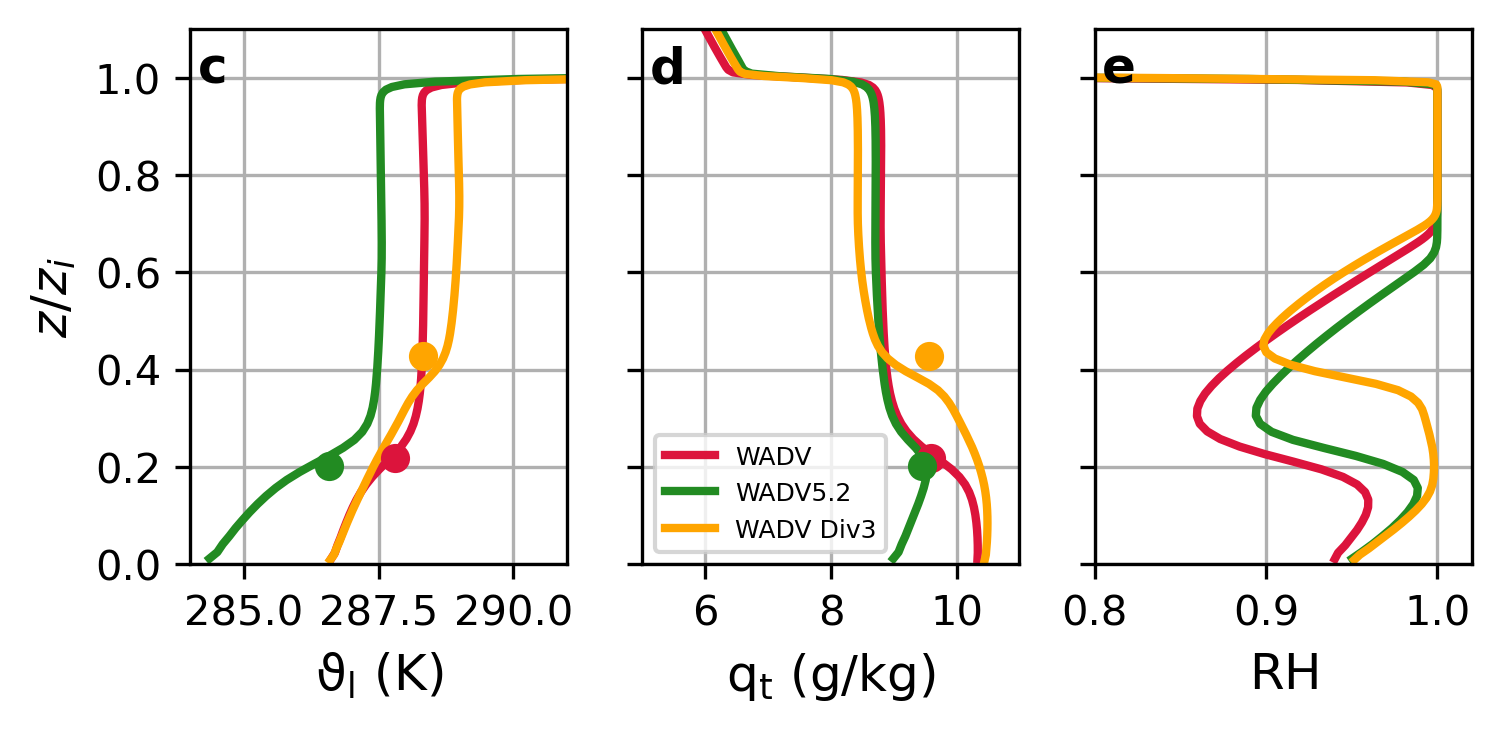

In [55]:
ind =30

fig, axs = plt.subplots(ncols = 3,
                        nrows = 1,
                        sharex = False, sharey = True,
                        figsize=(14/2.54, (6)/2.54), dpi = 300)

pltprf(axs[0], f['THETAL'][ind], f1['THETAL'][ind], f2['THETAL'][ind],
       z/f.ZINV[ind], z/f1.ZINV[ind], z/f2.ZINV[ind],
       [284, 291],
       xlabel = r"$\mathrm{\vartheta_l \ (K)}$", ylabel = '$z/z_i$')

pltprf(axs[1], f['QT'][ind], f1['QT'][ind], f2['QT'][ind],
       z/f.ZINV[ind], z/f1.ZINV[ind], z/f2.ZINV[ind],
       [5, 11],
       xlabel = r"$\mathrm{q_t \ (g/kg)}$")

# pltprf(axs[2], f['W2'][ind], f1['W2'][ind], f2['W2'][ind],
#        z/f.ZINV[ind], z/f1.ZINV[ind], z/f2.ZINV[ind],
#        [0, 0.25],
#        xlabel = r"$\mathrm{W2 \ (m^2s^{-2})}$")

pltprf(axs[2], f['QV'][ind]/f['QSAT'][ind], f1['QV'][ind]/f1['QSAT'][ind], f2['QV'][ind]/f2['QSAT'][ind],
       z/f.ZINV[ind], z/f1.ZINV[ind], z/f2.ZINV[ind],
       [0.8, 1.02],
       xlabel = r"$\mathrm{RH}$")

# pltprf(axs[2], f['THL2'][ind], f1['THL2'][ind], f2['THL2'][ind],
#        z/f.ZINV[ind], z/f1.ZINV[ind], z/f2.ZINV[ind],
#        [0, 0.04],
#        xlabel = r"$\mathrm{THL2 \ (K^2)}$")

axs[1].legend(loc="lower left", fontsize=0.5*myfontsize)

axs[0].plot(thl_zinv_bot[ind], zinv_bot[ind], 'o', color = 'crimson')
axs[1].plot(qt_zinv_bot[ind], zinv_bot[ind], 'o', color = 'crimson')
axs[2].plot(thl2_zinv_bot[ind], zinv_bot[ind], 'o', color = 'crimson')

axs[0].plot(thl_zinv_bot1[ind], zinv_bot1[ind], 'o', color = 'forestgreen')
axs[1].plot(qt_zinv_bot1[ind], zinv_bot1[ind], 'o', color = 'forestgreen')
axs[2].plot(thl2_zinv_bot1[ind], zinv_bot1[ind], 'o', color = 'forestgreen')

axs[0].plot(thl_zinv_bot2[ind], zinv_bot2[ind], 'o', color = 'orange')
axs[1].plot(qt_zinv_bot2[ind], zinv_bot2[ind], 'o', color = 'orange')
axs[2].plot(thl2_zinv_bot2[ind], zinv_bot2[ind], 'o', color = 'orange')

for i, label in enumerate(('c', 'd', 'e')):
    axs[i].text(0.02, 0.9, label, transform=axs[i].transAxes,
                fontsize=myfontsize, fontweight='bold')

In [23]:
print(2816*26)

73216


In [118]:
f

<xarray.Dataset>
Dimensions:               (time: 60, z: 512)
Coordinates:
  * z                     (z) float32 10.5 22.5 37.5 ... 4055.5 4182.2 4320.9
  * time                  (time) float32 165.02083 165.0625 ... 167.47917
Data variables:
    p                     (z) float32 dask.array<chunksize=(512,), meta=np.ndarray>
    SST                   (time) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    Ps                    (time) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    CLDSHD                (time) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    AREAPREC              (time) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    CLD245                (time) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    WMAX                  (time) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    UMAX                  (time) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    PREC                  (time) float32 dask.array<chunksize=(60,), me

In [123]:
from sam_sat import *
qsat = qsatw(f.SST,f.Ps)
qsat1 = qsatw(f1.SST,f1.Ps)
qsat2 = qsatw(f2.SST,f2.Ps)

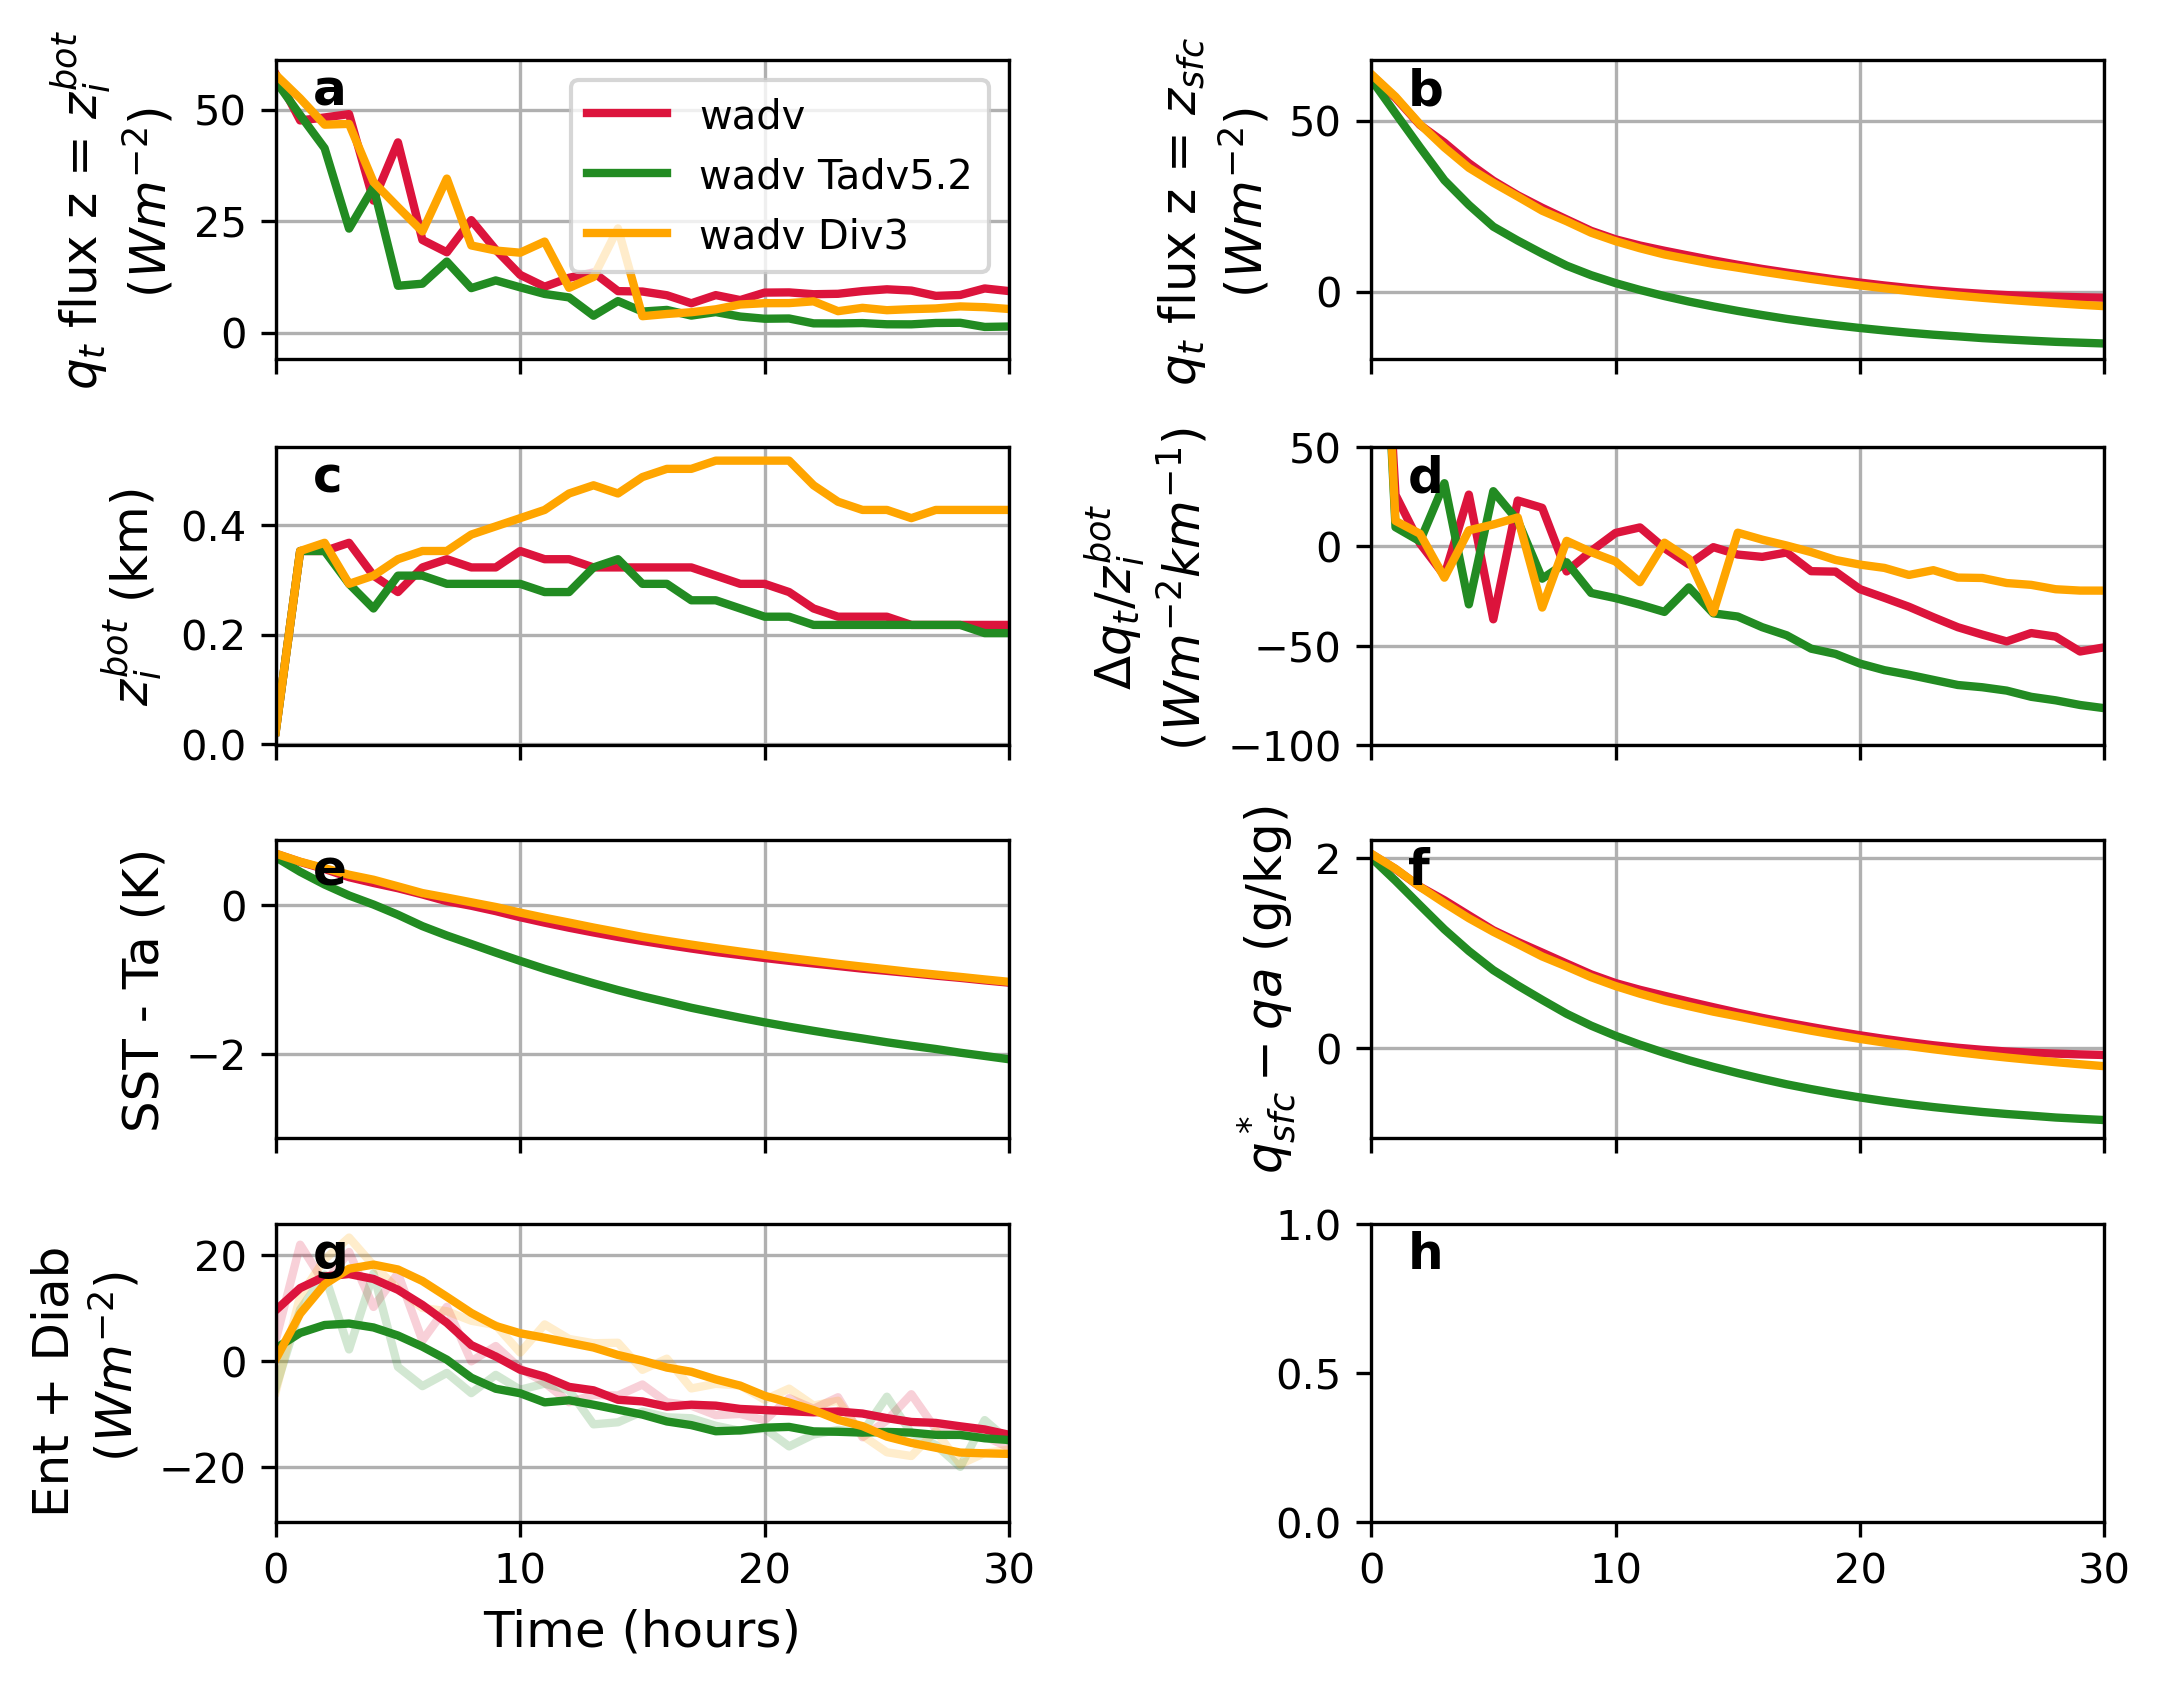

In [128]:
fig, axs = plt.subplots(ncols = 2,
                        nrows = 4,
                        sharex = True, sharey = False,
                        figsize=(18/2.54, (14)/2.54), dpi = 300, constrained_layout=True)

# plt.tight_layout()

plt1D(axs[0,0], t_hours, qtflx_up, qtflx_up1, qtflx_up2,
      "$q_t$ flux z = $z_i^{bot}$ \n $(Wm^{-2})$", xlabel = 0, xrange = [0, 30])
axs[0,0].legend(loc="best", fontsize=0.8*myfontsize)

plt1D(axs[0,1], t_hours, qtflx_bot, qtflx_bot1, qtflx_bot2,
      "$q_t$ flux z = $z_{sfc}$ \n $(Wm^{-2})$", xlabel = 0, xrange = [0, 30])

plt1D(axs[1,0], t_hours, zinv_bot, zinv_bot1,zinv_bot2,
      "$z_i^{bot}$ (km)", xlabel = 0, xrange = [0, 30])

plt1D(axs[1,1], t_hours, (qtflx_bot - qtflx_up)/zinv_bot, 
      (qtflx_bot1 - qtflx_up1)/zinv_bot1,
      (qtflx_bot2 - qtflx_up2)/zinv_bot2,
      "$\Delta q_t$/$z_i^{bot}$ \n $(Wm^{-2}km^{-1})$", xlabel = 0, xrange = [0, 30])

axs[1,1].set_ylim([-100, 50])

plt1D(axs[2,0], t_hours, f['SST'] - f['TABS'].isel(z=0), f1['SST'] - f1['TABS'].isel(z=0), f2['SST'] - f2['TABS'].isel(z=0),
      "SST - Ta (K)", xlabel = 0, xrange = [0, 30])

plt1D(axs[2,1], t_hours, 1000.*qsat - f['QT'].isel(z=0), 1000.*qsat1 - f1['QT'].isel(z=0), 1000.*qsat2 - f2['QT'].isel(z=0),
      "$q_{sfc}^* - qa$ (g/kg)", xlabel = 0, xrange = [0, 30])

plt1D(axs[3,0], t_hours, f['TVFLX_we_Wm2'] + f['Prec_wm2'] - f['CldRCool'],
      f1['TVFLX_we_Wm2'] + f1['Prec_wm2'] - f1['CldRCool'],
      f2['TVFLX_we_Wm2'] + f2['Prec_wm2'] - f2['CldRCool'],
      "Ent + Diab \n $(Wm^{-2})$", smooth = 1, xrange = [0, 30])

mylabel = np.array((['a','b'],['c','d'], ['e','f'], ['g','h']))

for i in range(4):
    for j in range (2):
        axs[i,j].text(0.05, 0.85, mylabel[i,j], transform=axs[i,j].transAxes,fontsize=myfontsize, fontweight='bold')

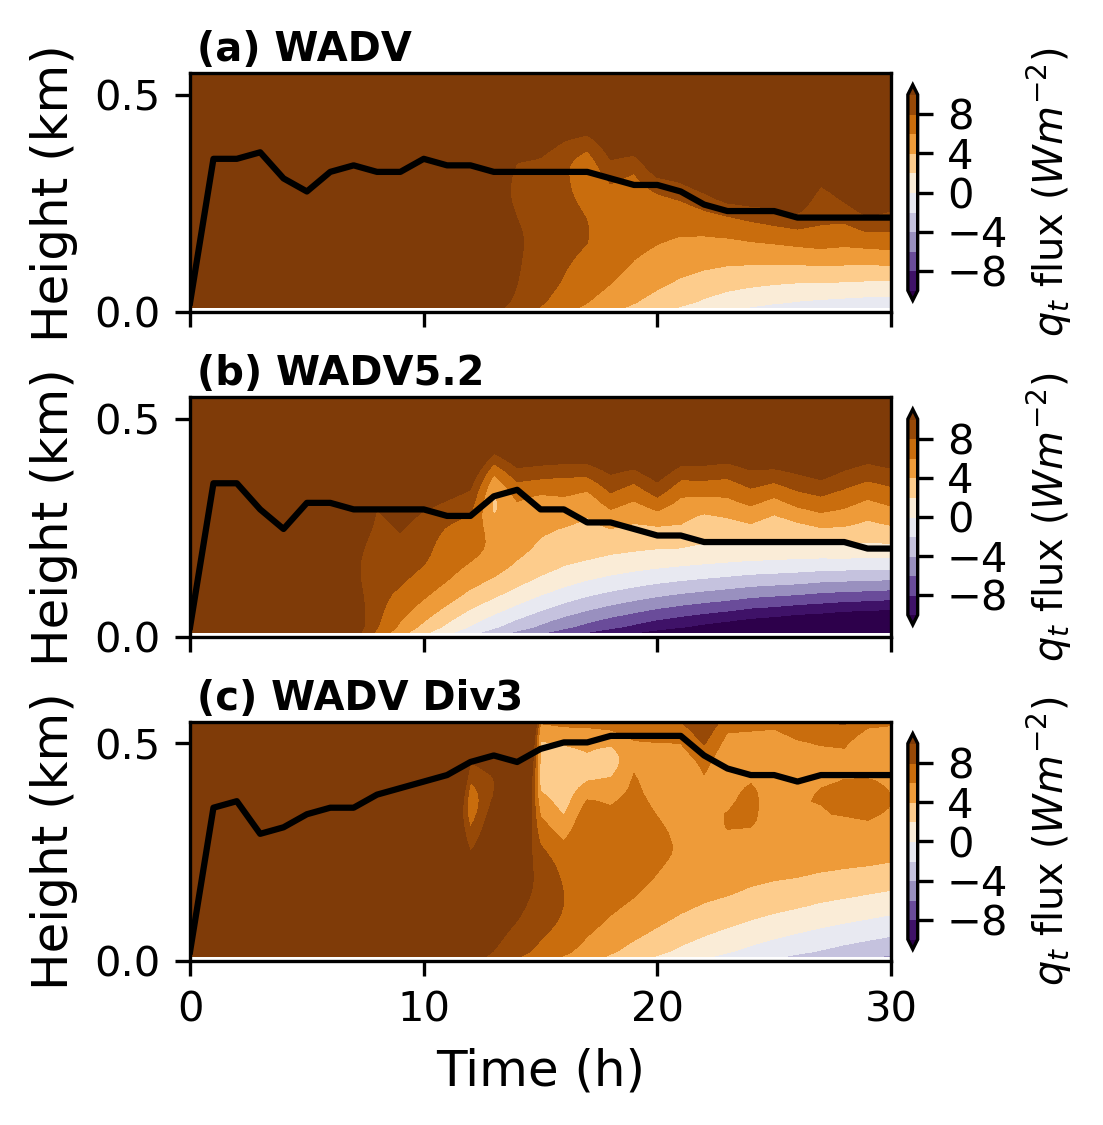

In [99]:
fig, axs = plt.subplots(ncols = 1,
                        nrows = 3,
                        sharex = True, sharey = False,
                        figsize=(9/2.54, (9)/2.54), dpi = 300)
plt.tight_layout()

# 
mylevels = np.linspace(-10, 10, 10 + 1)
var = f["QTFLUX"]
oax = plt2D(fig, axs[0], t_hours, z, var.T, 'QTFLUX', mycmap=cm.PuOr_r, mylevels=mylevels, extend='both',
     yrange = [0, 0.55], xrange = [0, 30], ylabel = True, out = True)

cbar = fig.colorbar(oax,  ax=axs[0], orientation='vertical', shrink=0.9,
                    pad=0.02)
cbar.set_label("$q_t$ flux $(Wm^{-2})$", fontsize=0.8*myfontsize)

var = f1["QTFLUX"]
oax = plt2D(fig, axs[1], t_hours, z, var.T, 'QTFLUX', mycmap=cm.PuOr_r, mylevels=mylevels, extend='both',
     yrange = [0, 0.55], xrange = [0, 30], ylabel = True, out = True)

cbar = fig.colorbar(oax,  ax=axs[1], orientation='vertical', shrink=0.9,
                    pad=0.02)
cbar.set_label("$q_t$ flux $(Wm^{-2})$", fontsize=0.8*myfontsize)

var = f2["QTFLUX"]
oax = plt2D(fig, axs[2], t_hours, z, var.T, 'QTFLUX', mycmap=cm.PuOr_r, mylevels=mylevels, extend='both',
     yrange = [0, 0.55], xrange = [0, 30], ylabel = True, xlabel = True, out = True)

cbar = fig.colorbar(oax,  ax=axs[2], orientation='vertical', shrink=0.9,
                    pad=0.02)
cbar.set_label("$q_t$ flux $(Wm^{-2})$", fontsize=0.8*myfontsize)

axs[0].plot(t_hours, zinv_bot, color = 'black')
axs[1].plot(t_hours, zinv_bot1, color = 'black')
axs[2].plot(t_hours, zinv_bot2, color = 'black')

for i, label in enumerate(('(a) WADV', '(b) WADV5.2', '(c) WADV Div3')):
    axs[i].text(0.01, 1.05, label, transform=axs[i].transAxes,
                fontsize=0.8*myfontsize, fontweight='bold')